# **Data collection**

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
from scipy import stats

In [ ]:
df = pd.read_csv('UK_Road_2023.csv')
df

<ipython-input-2-c3be9b6d5404>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UK_Road_2023.csv')


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrain_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_policeofficer_attend_the_scene_of_accident,trunk_road_flag,lsao_of_accident_location
0,2023010000000.0,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,Minor,1,...,5,Darkness without Streetlights,Hail,Snow,Construction,Broken Road Signs,1,Yes,Yes,E01003383
1,2023010000000.0,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,Minor,3,...,1,Darkness without Streetlights,Rain,Wet/Damp,Construction,Broken Road Signs,1,Yes,Yes,E01001547
2,2023010000000.0,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,Minor,2,...,0,Darkness without Streetlights,Rain,Wet/Damp,Construction,Broken Road Signs,1,Yes,Yes,E01002448
3,2023010000000.0,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,Minor,2,...,0,Darkness without Streetlights,Flooding,Wet/Damp,Construction,Broken Road Signs,1,Yes,Yes,E01000129
4,2023010000000.0,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,Minor,2,...,0,Darkness without Streetlights,Rain,Wet/Damp,Construction,Broken Road Signs,1,Yes,Yes,E01004583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104253,2.02399E+12,2023,991452286,246754.0,661133.0,-4.447490,55.819059,99,Serious,1,...,-1,Darkness with Streetlights,Blowing Debris,Snow,Road Closure,Dislodged Vehicle,1,Yes,Other,-1
104254,2.02399E+12,2023,991452640,224491.0,581627.0,-4.752200,55.097920,99,Minor,2,...,0,Daylight,Flooding,Wet/Damp,Construction,Broken Road Signs,2,Unknown,Other,-1
104255,2.02399E+12,2023,991453360,383341.0,806427.0,-2.276957,57.148422,99,Minor,2,...,-1,Darkness without Streetlights,Blowing Debris,Snow,Road Closure,Dislodged Vehicle,1,Yes,Other,-1
104256,2.02399E+12,2023,991461915,271662.0,655488.0,-4.047591,55.775637,99,Minor,1,...,-1,Darkness without Streetlights,Hail,Wet/Damp,Road Closure,Dislodged Vehicle,1,Yes,Other,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 36 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   accident_index                                  104258 non-null  object 
 1   accident_year                                   104258 non-null  int64  
 2   accident_reference                              104258 non-null  object 
 3   location_easting_osgr                           104246 non-null  float64
 4   location_northing_osgr                          104246 non-null  float64
 5   longitude                                       104246 non-null  float64
 6   latitude                                        104246 non-null  float64
 7   police_force                                    104258 non-null  int64  
 8   accident_severity                               104258 non-null  object 
 9   number_of_vehicles        

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,104258.0,2023.000000,0.000000,2023.000000,2023.000000,2023.000000,2023.000000,2.023000e+03
location_easting_osgr,104246.0,455388.583284,92264.787002,70537.000000,393842.000000,462486.500000,529489.250000,6.551600e+05
location_northing_osgr,104246.0,275499.289018,146600.014090,10528.000000,174898.250000,214905.500000,383427.500000,1.152174e+06
longitude,104246.0,-1.204893,1.349407,-7.429339,-2.093077,-1.082364,-0.134329,1.756018e+00
latitude,104246.0,52.366984,1.320853,49.914528,51.460339,51.819044,53.344464,6.025242e+01
police_force,104258.0,27.638397,24.321077,1.000000,4.000000,22.000000,45.000000,9.900000e+01
number_of_vehicles,104258.0,1.820628,0.689053,1.000000,1.000000,2.000000,2.000000,1.700000e+01
number_of_casualties,104258.0,1.275461,0.737006,1.000000,1.000000,1.000000,1.000000,7.000000e+01
local_authority_district,104258.0,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00
first_road_class,104258.0,4.225565,1.464022,1.000000,3.000000,4.000000,6.000000,6.000000e+00


In [ ]:
df.isnull().sum()

,0
accident_index,0
accident_year,0
accident_reference,0
location_easting_osgr,12
location_northing_osgr,12
longitude,12
latitude,12
police_force,0
accident_severity,0
number_of_vehicles,0


In [ ]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'location_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrain_crossing_human_control',
       'pedestrain_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_policeofficer_attend_the_scene_of_accident',
       'trunk_road_flag', 'lsao_of_accident_location'],
      dtype='object')

In [ ]:
df['carriageway_hazards'].fillna('Unknown', inplace=True)
df.dropna(subset=['latitude', 'longitude'], inplace=True)

<ipython-input-7-a9a5328d9929>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carriageway_hazards'].fillna('Unknown', inplace=True)


In [ ]:
# Convert date and time columns
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y') # Specify the correct format for 'date' column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

In [ ]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
# Drop irrelevant columns
columns_to_drop = ["accident_index", "accident_year", "accident_reference", 'location_easting_osgr', 'location_northing_osgr', 'police_force', 'local_authority_district', 'location_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'second_road_class',
       'pedestrain_crossing_human_control',
       'pedestrain_crossing_physical_facilities', 'urban_or_rural_area', 'did_policeofficer_attend_the_scene_of_accident',
       'trunk_road_flag', 'lsao_of_accident_location' ]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_number', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'hour'],
      dtype='object')

# **EDA Exploratary Data Analysis**

<ipython-input-12-a164cb5c9db2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='accident_severity', data=df, palette='Set2')


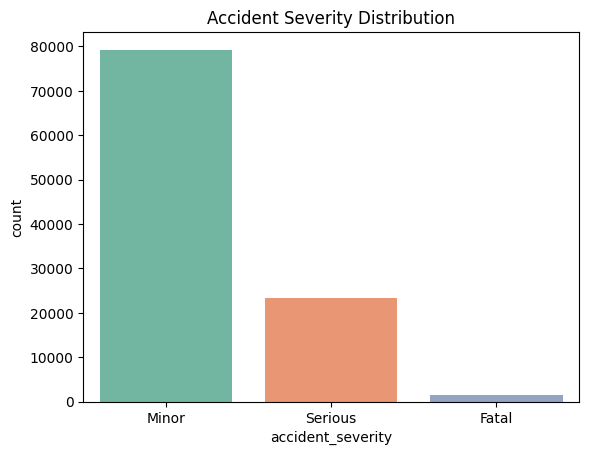

In [ ]:
sns.countplot(x='accident_severity', data=df, palette='Set2')
plt.title('Accident Severity Distribution')
plt.show()

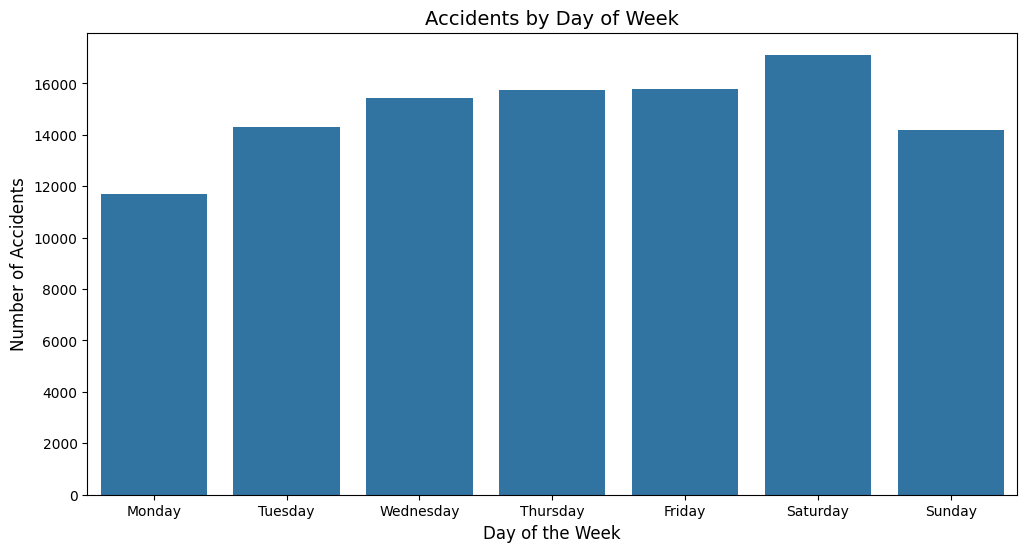

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

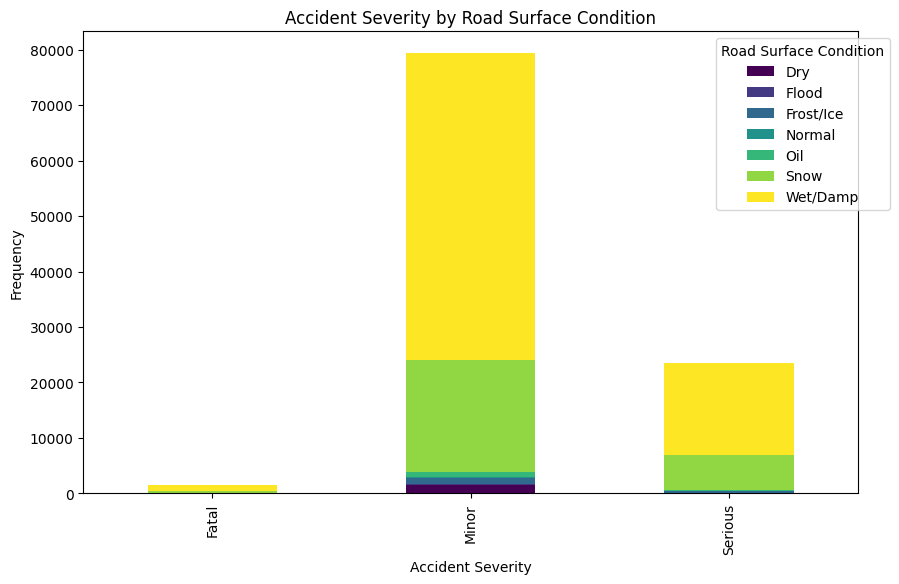

In [ ]:
# Stacked bar chart
# Create severity_surface_table using pd.crosstab
severity_surface_table = pd.crosstab(df['accident_severity'], df['road_surface_conditions'])

#  plot the stacked bar chart
severity_surface_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Accident Severity by Road Surface Condition')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.legend(title='Road Surface Condition', bbox_to_anchor=(1.05, 1))
plt.show()

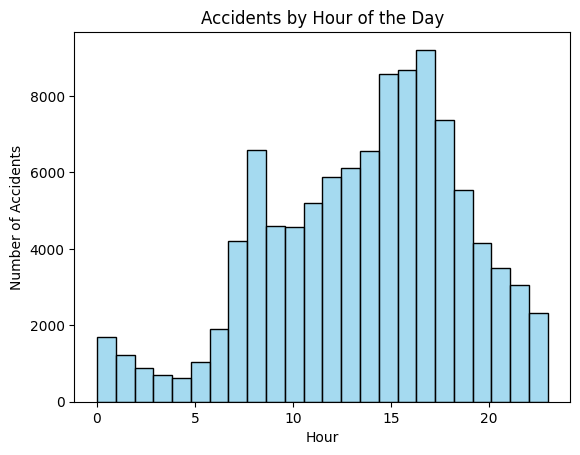

In [ ]:
sns.histplot(df['hour'], bins=24, kde=False, color='skyblue')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

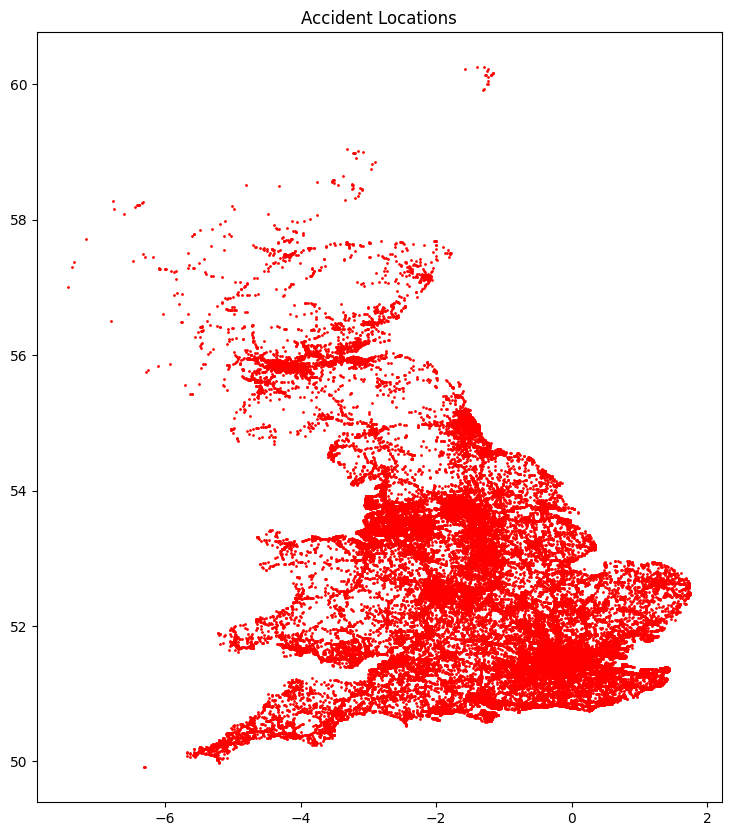

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf.plot(markersize=1, figsize=(10, 10), color='red')
plt.title('Accident Locations')
plt.show()

In [ ]:
from folium.plugins import HeatMap
import folium

# Create a map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m

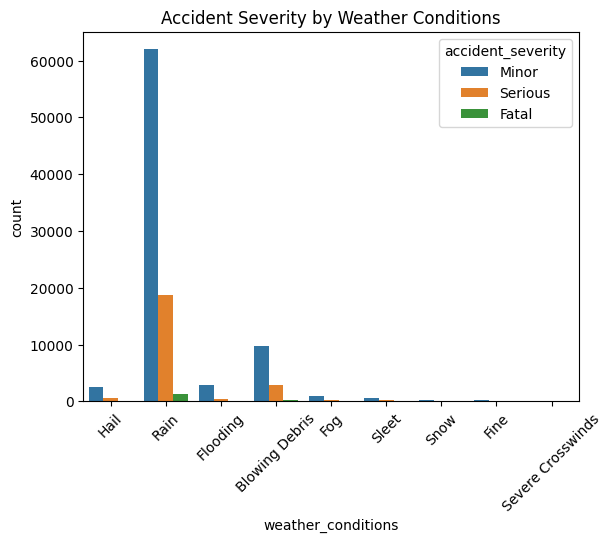

In [ ]:
sns.countplot(x='weather_conditions', hue='accident_severity', data=df)
plt.xticks(rotation=45)
plt.title('Accident Severity by Weather Conditions')
plt.show()

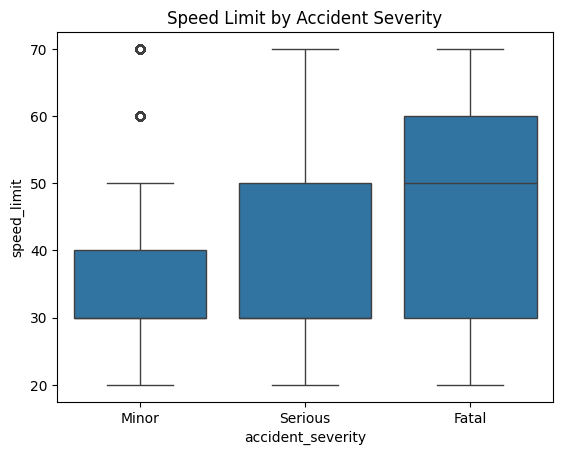

In [ ]:
sns.boxplot(x='accident_severity', y='speed_limit', data=df)
plt.title('Speed Limit by Accident Severity')
plt.show()

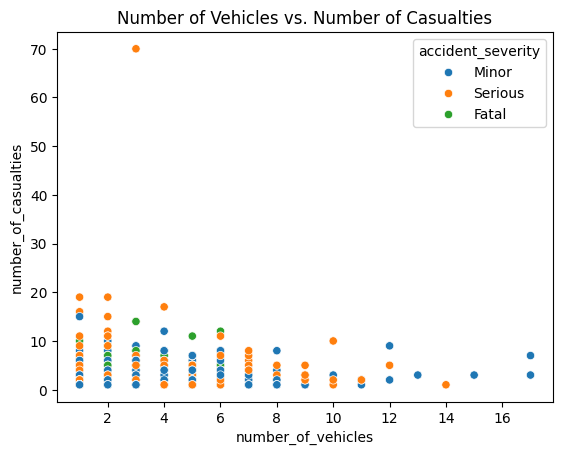

In [ ]:
sns.scatterplot(x='number_of_vehicles', y='number_of_casualties', hue='accident_severity', data=df)
plt.title('Number of Vehicles vs. Number of Casualties')
plt.show()

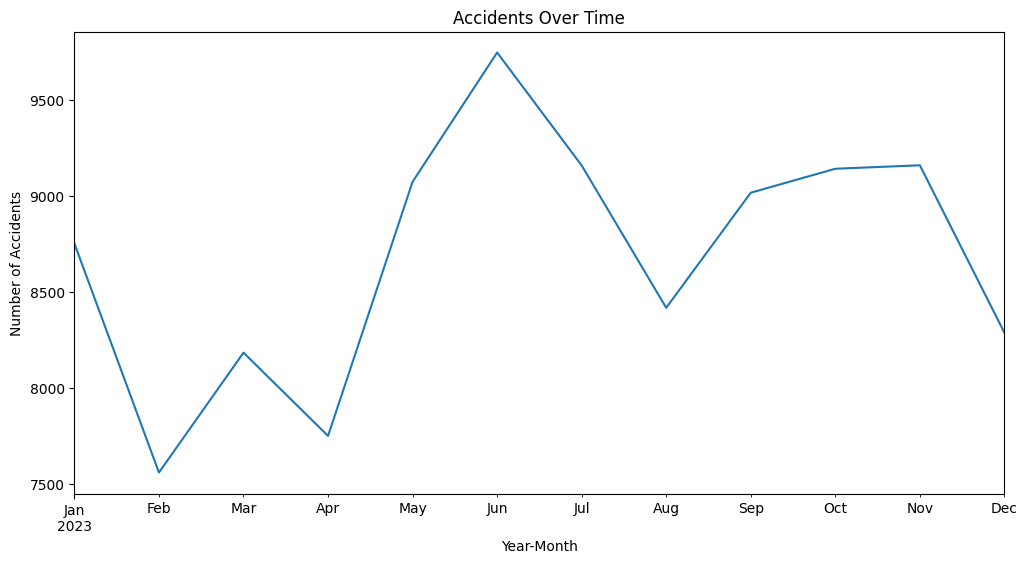

In [ ]:
df['year_month'] = df['date'].dt.to_period('M')
accidents_time = df.groupby('year_month').size()

accidents_time.plot(figsize=(12, 6), title='Accidents Over Time')
plt.ylabel('Number of Accidents')
plt.xlabel('Year-Month')
plt.show()

In [ ]:
accident_severity_data = {'Light_Conditions' : df.light_conditions,
                          'Weather_Conditions' : df.weather_conditions,
                          'Accident_Severity' : df.accident_severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df.sample(6)

,Light_Conditions,Weather_Conditions,Accident_Severity
89954,Daylight,Rain,Minor
15236,Daylight,Rain,Minor
96850,Overcast,Rain,Serious
32355,Darkness without Streetlights,Blowing Debris,Minor
965,Daylight,Rain,Minor
58013,Daylight,Rain,Serious


<ipython-input-24-46cb747a3ec9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'road_type', y = 'accident_severity', data = df, palette='rocket')


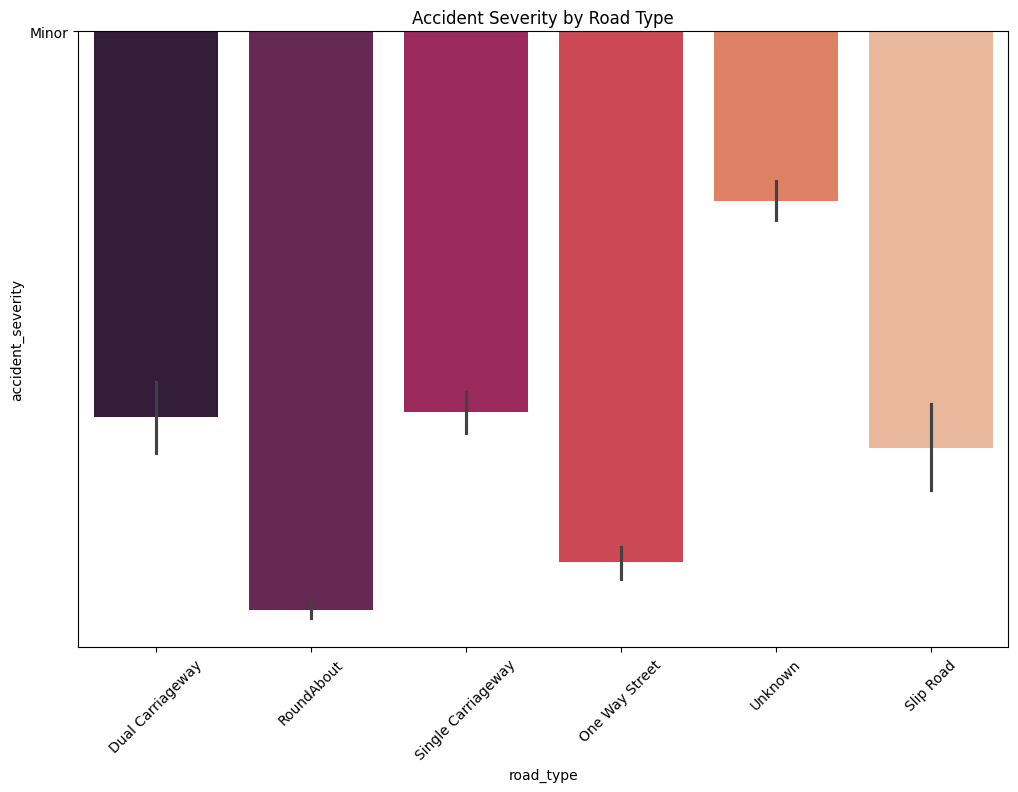

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'road_type', y = 'accident_severity', data = df, palette='rocket')
plt.xticks(rotation=45)
plt.title('Accident Severity by Road Type')
plt.show()

<ipython-input-25-d5204a39c63d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='road_surface_conditions', y='accident_severity', data=df, palette='rocket_r')


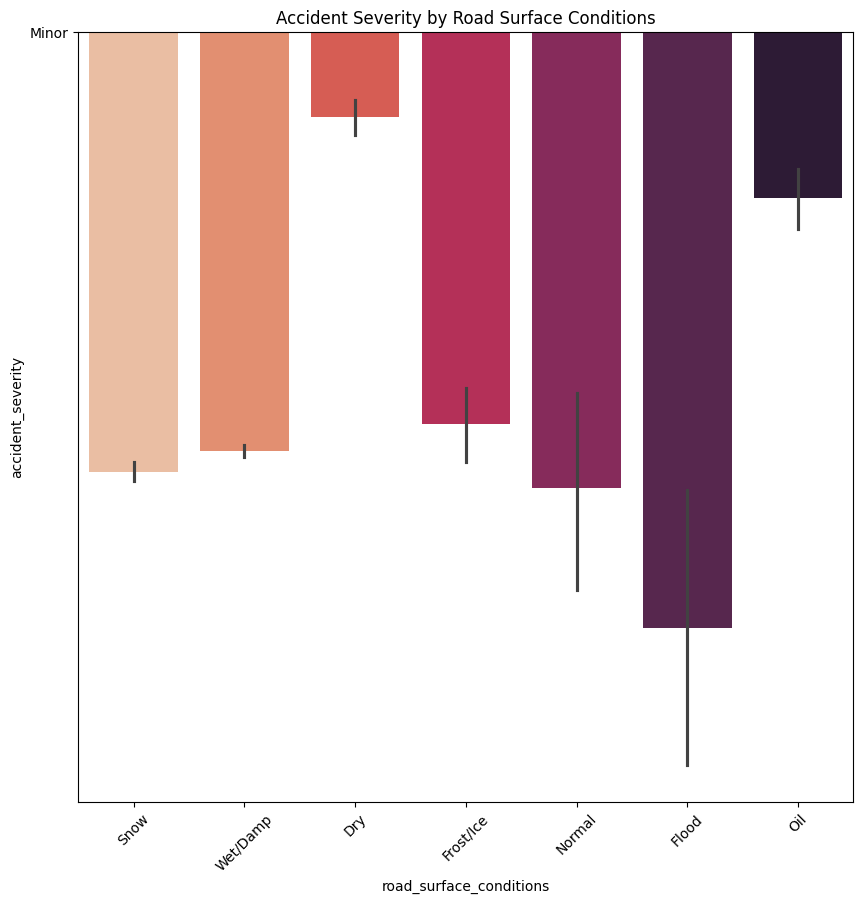

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='road_surface_conditions', y='accident_severity', data=df, palette='rocket_r')
plt.xticks(rotation=45)
plt.title('Accident Severity by Road Surface Conditions')
plt.show()

In [ ]:
data = {'Casualties_Count' : df['number_of_casualties'], # Change 'Number_of_Casualties' to 'number_of_casualties'
             'Day_of_Week' : df['day_of_week']} # Change 'Day_of_Week' to 'day_of_week'
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

,Casualties_Count
Day_of_Week,
Saturday,21802
Friday,19635
Thursday,19472
Wednesday,19175
Sunday,19018
Tuesday,18035
Monday,15827


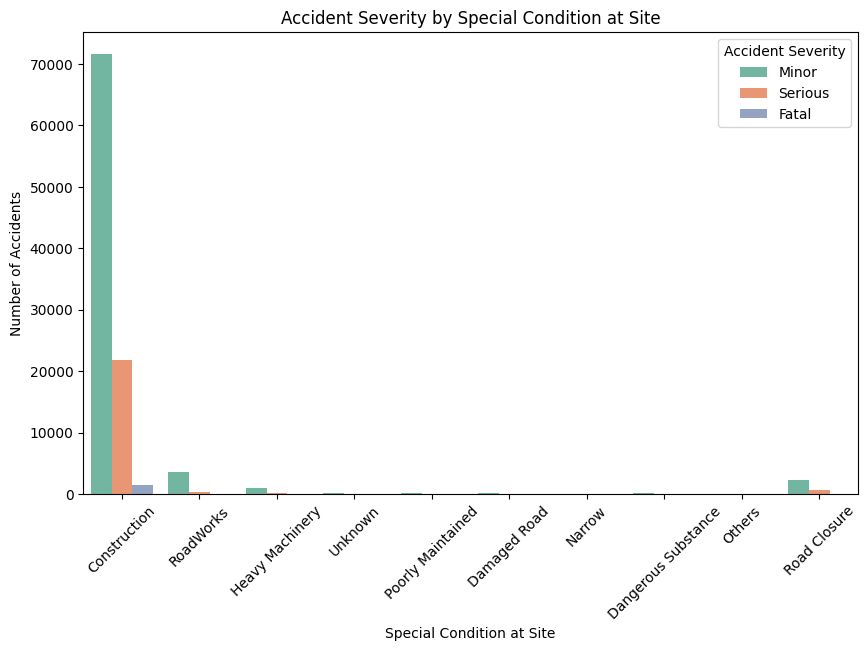

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='special_conditions_at_site', hue='accident_severity', data=df, palette='Set2')

plt.title('Accident Severity by Special Condition at Site')
plt.xlabel('Special Condition at Site')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Accident Severity')
plt.show()

# **Statistical Analysis**

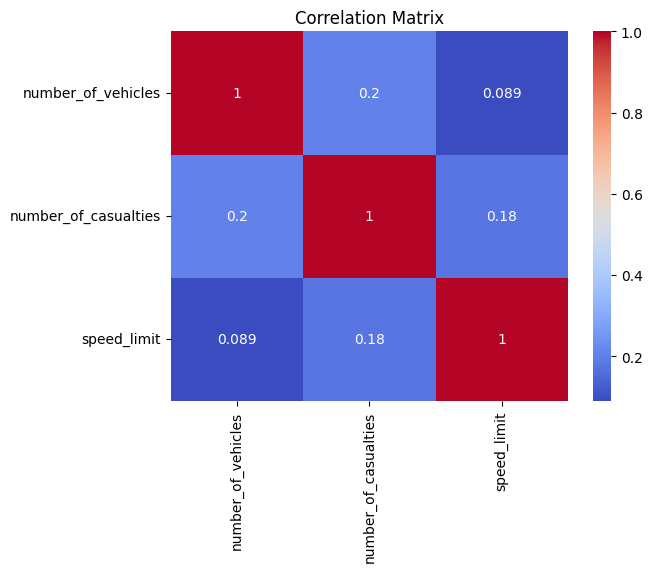

In [ ]:
# Correlation Matrix
corr_matrix = df[['number_of_vehicles', 'number_of_casualties', 'speed_limit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **CHI-Square Test**

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['weather_conditions'], df['accident_severity'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 1.3539774741973777e-74


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['light_conditions'], df['accident_severity'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 1.1803413019381023e-132


# **Hypothesis Testing**

In [ ]:
contingency_table = pd.crosstab(df['weather_conditions'], df['accident_severity'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.5f}")

# Hypothesis Decision
alpha = 0.05

if p < alpha:
    print(" Reject the Null Hypothesis (H₀): Weather conditions significantly affect accident severity.")
else:
    print(" Fail to Reject the Null Hypothesis (H₀): No significant relationship between weather conditions and accident severity.")

Chi-square Statistic: 397.28
Degrees of Freedom: 16
P-value: 0.00000
 Reject the Null Hypothesis (H₀): Weather conditions significantly affect accident severity.


In [ ]:
contingency_table = pd.crosstab(df['light_conditions'], df['accident_severity'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.5f}")

# Hypothesis Decision
alpha = 0.05

if p < alpha:
    print(" Reject the Null Hypothesis (H₀): Light conditions significantly affect accident severity.")
else:
    print(" Fail to Reject the Null Hypothesis (H₀): No significant relationship between Light conditions and accident severity.")

Chi-square Statistic: 638.58
Degrees of Freedom: 8
P-value: 0.00000
 Reject the Null Hypothesis (H₀): Light conditions significantly affect accident severity.


# **Data Imbalance Check**

<ipython-input-33-68befbd043d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='accident_severity', data=df, palette='Set2')


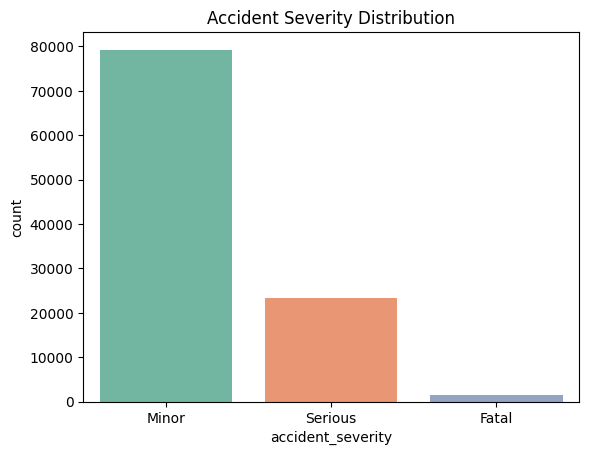

accident_severity
Minor      76.060472
Serious    22.479520
Fatal       1.460008
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='accident_severity', data=df, palette='Set2')
plt.title('Accident Severity Distribution')
plt.show()

# Percentage distribution
print(df['accident_severity'].value_counts(normalize=True) * 100)

# **Data Balance Using SMOTE**

<ipython-input-34-051c442f4ca2>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='coerce').astype(int) / 10**9
<ipython-input-34-051c442f4ca2>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='coerce').astype(int) / 10**9
<ipython-input-34-051c442f4ca2>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='coerce').astype(int) / 10**9
<ipython-input-34-051c442f4ca2>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling b

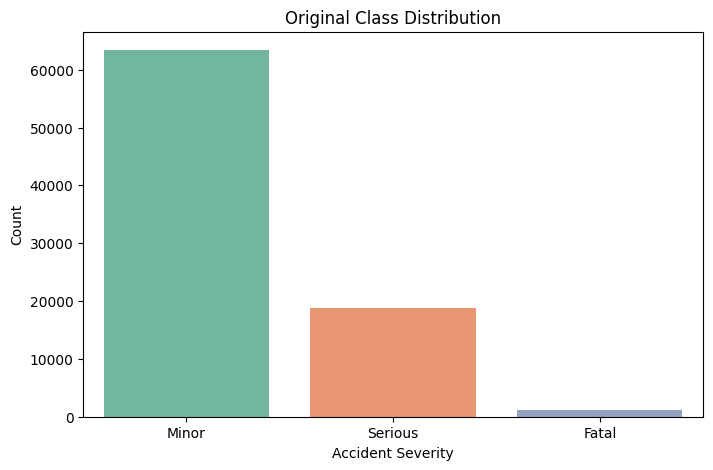

<ipython-input-34-051c442f4ca2>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled_smote, palette='Set1')


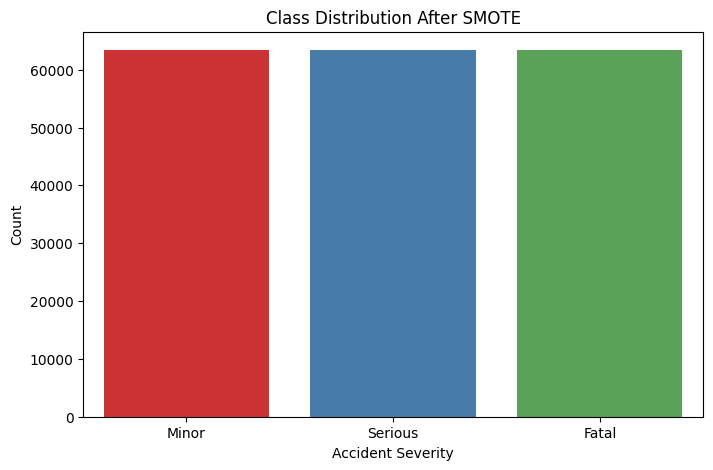

Original class distribution:
accident_severity
Minor      63392
Serious    18766
Fatal       1238
Name: count, dtype: int64

SMOTE Resampled class distribution:
accident_severity
Minor      63392
Serious    63392
Fatal      63392
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Define features (X) and target variable (y)
X = df.drop(columns=['accident_severity'])  # Replace 'accident_severity' with your target column name
y = df['accident_severity']

# Convert non-numeric columns to numeric
for col in X.select_dtypes(include=['object', 'datetime64']):
    try:
        X[col] = pd.to_datetime(X[col], errors='coerce').astype(int) / 10**9
    except Exception:
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop any remaining non-numeric columns
X = X.select_dtypes(include=['number'])

# Handle missing values (if any exist)
X.fillna(0, inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize original class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title('Original Class Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled_smote, palette='Set1')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Display class distributions before and after resampling
print("Original class distribution:")
print(y_train.value_counts())

print("\nSMOTE Resampled class distribution:")
print(pd.Series(y_resampled_smote).value_counts())

In [ ]:
import pandas as pd

# Assuming `balanced_df` is your balanced dataset

# Create balanced_df by combining X_resampled_smote and y_resampled_smote
balanced_df = pd.DataFrame(X_resampled_smote)
balanced_df['accident_severity'] = y_resampled_smote #Add the target variable back to the DataFrame


balanced_df.to_csv("balanced_road_accidents.csv", index=False)

In [ ]:
import pandas as pd

# Load the balanced dataset
df = pd.read_csv("balanced_road_accidents.csv")

In [ ]:
df.head()

,longitude,latitude,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_number,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,hour,accident_severity
0,-0.337767,51.230412,1,1,1.680739e+09,-9.223372e+09,1.744728e+09,25,-9.223372e+09,30,0,-1,-1,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,14,Minor
1,-0.256814,51.506548,2,1,1.679357e+09,-9.223372e+09,1.744759e+09,4020,-9.223372e+09,30,6,2,0,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,23,Minor
2,-0.440259,51.480895,2,1,1.676160e+09,-9.223372e+09,1.744729e+09,4,-9.223372e+09,40,3,4,4,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,15,Serious
3,-0.172150,51.491572,2,1,1.673395e+09,-9.223372e+09,1.744734e+09,308,-9.223372e+09,30,3,2,304,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,16,Minor
4,-0.164340,51.521036,1,1,1.690934e+09,-9.223372e+09,1.744750e+09,501,-9.223372e+09,20,6,2,507,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,20,Serious


In [ ]:
balanced_df = df.copy()

# **Feature Selection**

# **Filter Method**

**Mutual Information**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Define features and target
target_column = "accident_severity"
X = balanced_df.drop(columns=[target_column])
y = balanced_df[target_column]

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features="auto")

# Convert to a Pandas Series for better visualization
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Select top N features (e.g., top 10)
top_n = 10  # Change as needed
selected_features_filter = mi_series.head(top_n).index

print("Top Features (Filter - MI):", selected_features_filter.tolist())

# Keep only the selected features
X_filtered = X[selected_features_filter]

Top Features (Filter - MI): ['time', 'speed_limit', 'date', 'junction_control', 'first_road_number', 'junction_detail', 'latitude', 'number_of_vehicles', 'longitude', 'second_road_number']


# **Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'accident_severity' is the target variable
X = balanced_df.drop(columns=["accident_severity"])
y = balanced_df["accident_severity"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display important features
print(feature_importances)

                       Feature  Importance
9                  speed_limit    0.152127
4                         date    0.129529
1                     latitude    0.124349
0                    longitude    0.115723
7            first_road_number    0.109342
6                         time    0.101124
11            junction_control    0.063061
18                        hour    0.062450
2           number_of_vehicles    0.043864
10             junction_detail    0.042903
12          second_road_number    0.033897
3         number_of_casualties    0.021630
5                  day_of_week    0.000000
8                    road_type    0.000000
13            light_conditions    0.000000
14          weather_conditions    0.000000
15     road_surface_conditions    0.000000
16  special_conditions_at_site    0.000000
17         carriageway_hazards    0.000000


# **Embedded Method**

# **LASSO Regression**

Selected Features: ['longitude' 'latitude' 'number_of_vehicles' 'number_of_casualties'
 'first_road_number' 'speed_limit' 'junction_detail' 'junction_control'
 'hour']


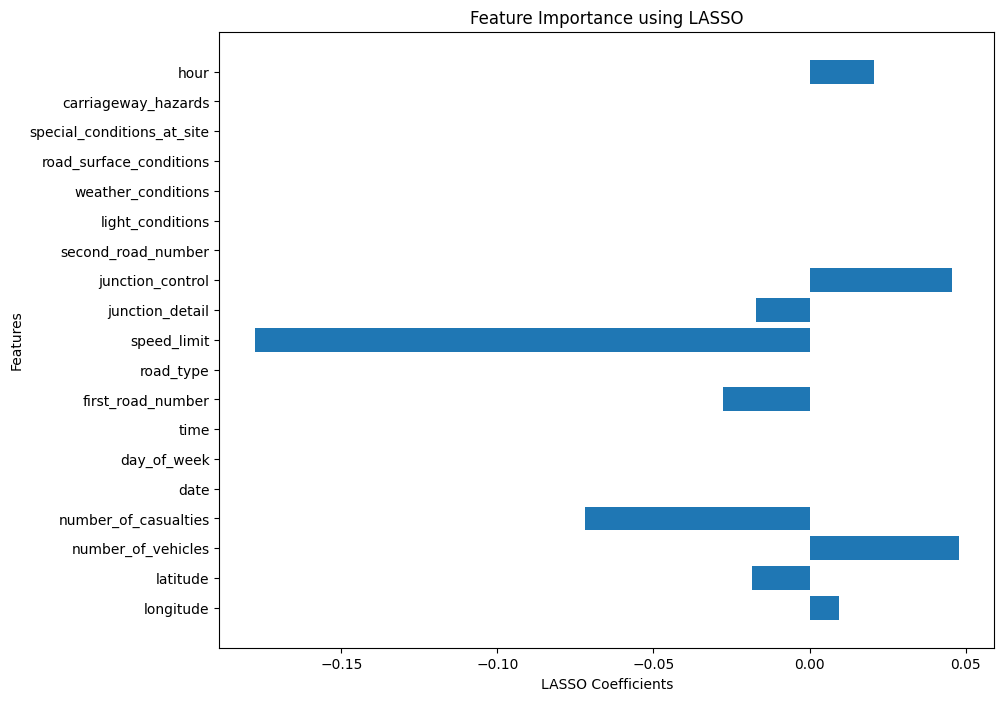

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("balanced_road_accidents.csv")

# Define target variable
target = "accident_severity"
X = balanced_df.drop(columns=[target])  # Features
y = balanced_df[target]  # Target variable

# Handle categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Standardize the features (LASSO requires standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Apply LASSO for Feature Selection
lasso = Lasso(alpha=0.01)  # You can tune alpha for feature selection
lasso.fit(X_train, y_train)

# Get feature importance
lasso_coef = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})

# Select important features (non-zero coefficients)
selected_features = lasso_coef[lasso_coef["Coefficient"] != 0]["Feature"].values
print("Selected Features:", selected_features)

# Plot Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(lasso_coef["Feature"], lasso_coef["Coefficient"])
plt.xlabel("LASSO Coefficients")
plt.ylabel("Features")
plt.title("Feature Importance using LASSO")
plt.show()

# **Wrapper Method**

# **Recursive feature Elimination**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
target_column = "accident_severity"  # Change this based on your dataset
X = balanced_df.drop(columns=[target_column])
y = balanced_df[target_column]

# Split the data (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=10)  # Change number of features as needed
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)  # Apply same transformation to test data

# Get selected feature names
selected_rfe_features = X.columns[rfe.support_]
print("Selected Features (Wrapper - RFE):", selected_rfe_features.tolist())

# Train the model with selected features (optional)
model.fit(X_train_rfe, y_train)
print("Model trained with selected features!")

Selected Features (Wrapper - RFE): ['longitude', 'latitude', 'number_of_vehicles', 'date', 'time', 'first_road_number', 'speed_limit', 'junction_detail', 'junction_control', 'hour']
Model trained with selected features!


# **PyCaret**

In [ ]:
!pip install pycaret --upgrade

In [ ]:
import pandas as pd
from pycaret.classification import setup, compare_models, get_config

# Load the dataset
df = pd.read_csv("balanced_road_accidents.csv")

# Define target variable
target = "accident_severity"

# Define the specific features you want to use
selected_features = [
    "speed_limit",
    "number_of_vehicles",
    "number_of_casualties",
    "junction_control",
    "longitude",
    "latitude"
]

# Create a new dataframe with selected features + target
df_selected = df[selected_features + [target]]

# Initialize PyCaret with selected features
clf = setup(
    data=df_selected,
    target=target,
    session_id=123  # Ensures reproducibility
)

# Compare models to find the best one
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,accident_severity
2,Target type,Multiclass
3,Target mapping,"Fatal: 0, Minor: 1, Serious: 2"
4,Original data shape,"(190176, 7)"
5,Transformed data shape,"(190176, 7)"
6,Transformed train set shape,"(133123, 7)"
7,Transformed test set shape,"(57053, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6939,0.8553,0.6939,0.6861,0.6864,0.5408,0.5436,27.5760
et,Extra Trees Classifier,0.6886,0.8546,0.6886,0.6813,0.6826,0.5328,0.5347,16.9420
xgboost,Extreme Gradient Boosting,0.6762,0.8399,0.6762,0.6672,0.6574,0.5143,0.5250,4.0920
lightgbm,Light Gradient Boosting Machine,0.6682,0.8341,0.6682,0.6592,0.6470,0.5023,0.5146,8.6180
knn,K Neighbors Classifier,0.6595,0.8176,0.6595,0.6480,0.6466,0.4892,0.4946,3.0280
gbc,Gradient Boosting Classifier,0.6531,0.0000,0.6531,0.6418,0.6334,0.4796,0.4897,53.5300
dt,Decision Tree Classifier,0.6422,0.7317,0.6422,0.6406,0.6413,0.4633,0.4634,1.3010
ada,Ada Boost Classifier,0.6264,0.0000,0.6264,0.6158,0.6174,0.4396,0.4423,4.7780
ridge,Ridge Classifier,0.5349,0.0000,0.5349,0.5255,0.5224,0.3024,0.3067,0.4580
nb,Naive Bayes,0.5329,0.7100,0.5329,0.5292,0.5302,0.2993,0.2999,0.6370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Training Models and Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

selected_features = ['speed_limit', "number_of_vehicles",
    "number_of_casualties",
    "hour",
    "longitude",
    "latitude"]

# Add target column
selected_features.append('accident_severity')

# Subset the balanced dataframe
df_selected = balanced_df[selected_features]

# Separate features and target
X = df_selected.drop('accident_severity', axis=1)
y = df_selected['accident_severity']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n📌 Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


📌 Random Forest Accuracy: 0.7003
              precision    recall  f1-score   support

       Fatal       0.74      0.82      0.78     12600
       Minor       0.71      0.80      0.75     12539
     Serious       0.63      0.50      0.55     12897

    accuracy                           0.70     38036
   macro avg       0.69      0.70      0.69     38036
weighted avg       0.69      0.70      0.69     38036



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
import joblib

# === Step 1: Use only selected features from PyCaret ===
selected_features = ['speed_limit', "number_of_vehicles",
    "number_of_casualties",
    "hour",
    "longitude",
    "latitude"]
selected_features.append('accident_severity')  # Add target column

# Subset dataframe
df_selected = balanced_df[selected_features]

# === Step 2: Split data ===
X = df_selected.drop('accident_severity', axis=1)
y = df_selected['accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 3: Initialize base model ===
rf_model = RandomForestClassifier(random_state=42)

# === Step 4: Define hyperparameter grid ===
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# === Step 5: Initialize RandomizedSearchCV ===
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

# === Step 6: Fit the model ===
random_search.fit(X_train, y_train)

# === Step 7: Save the best model ===
best_rf_model = random_search.best_estimator_
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
print("✅ Model saved as 'best_random_forest_model.pkl'")

# === Step 8: Load and Evaluate (optional) ===
# best_rf_model = joblib.load('best_random_forest_model.pkl')  # Uncomment to load

# Predictions and metrics
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("🎯 Best Parameters Found: ", random_search.best_params_)
print(f"\n📌 Best Random Forest Accuracy after Hyperparameter Tuning: {accuracy_rf_best:.4f}")
print(classification_report(y_test, y_pred_rf_best))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Created dataset file at: .gradio/flagged/dataset1.csv
✅ Model saved as 'best_random_forest_model.pkl'
🎯 Best Parameters Found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 107}

📌 Best Random Forest Accuracy after Hyperparameter Tuning: 0.7119
              precision    recall  f1-score   support

       Fatal       0.77      0.83      0.80     12600
       Minor       0.70      0.77      0.74     12539
     Serious       0.64      0.53      0.58     12897

    accuracy                           0.71     38036
   macro avg       0.71      0.71      0.71     38036
weighted avg       0.71      0.71      0.71     38036



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best model
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Report results
print(f"📊 Cross-Validation Accuracy Scores: {cv_scores}")
print(f"✅ Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"📉 Standard Deviation: {cv_scores.std():.4f}")

📊 Cross-Validation Accuracy Scores: [0.58652329 0.68450112 0.73193112 0.73106349 0.7335349 ]
✅ Mean CV Accuracy: 0.6935
📉 Standard Deviation: 0.0566


# **Deployment**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install --upgrade numpy
!pip install --upgrade numpy joblib scikit-learn

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires numpy<1.27,>=1.21, but you have numpy 2.2.4 which is incompatible.
matplotlib 3.7.5 requires numpy<2,>=1.20, but you have numpy 2.2.4 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.4 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.4 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.4 which is incompatible.


In [4]:
!pip install --no-cache-dir pycaret gradio matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 160.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 250.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 189.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 231.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 197.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 224.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 203.7 MB/s eta 0:00:00


In [1]:
import gradio as gr
import joblib
import numpy as np

# Load the saved model
model = joblib.load('/content/drive/MyDrive/best_random_forest_model.pkl')

# Define prediction function
def predict_accident_severity(speed_limit, number_of_vehicles, number_of_casualties, hour, longitude, latitude):
    # Create input array
    input_data = np.array([[speed_limit, number_of_vehicles, number_of_casualties, hour, longitude, latitude]])
    prediction = model.predict(input_data)[0]
    return f"Predicted Accident Severity: {prediction}"

# Create the UI
ui = gr.Interface(
    fn=predict_accident_severity,
    inputs=[
        gr.Number(label="Speed Limit"),
        gr.Number(label="Number of Vehicles"),
        gr.Number(label="Number of Casualties"),
        gr.Number(label="Hour"),
        gr.Number(label="Longitude"),
        gr.Number(label="Latitude")
    ],
    outputs="text",
    title="🚨 Accident Severity Predictor",
    description="Enter traffic-related details to predict the severity of a road accident.",
    allow_flagging="never"  # <- This removes the 'Flag' button
)

# Launch the app
ui.launch()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f64d7641cb6fc2ea41.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
